In [17]:
import pandas as pd
import numpy as np
from Krahnert import Krahnert
from time import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Part I: Basic results: 
- A surrogate model must execute faster than 20 ms/call to be a good candidate
- Passing the Jacobian saves you time (about 33% in this case)
- Downside: You need to have the jacobian
- Silver lining: elementary steps are simple functions. Jacobian can be tedious but it is not hard to compute. 

In [3]:
kra = Krahnert(1229.6, #K
                500, #kPa
                {'NH3':2.06e-3, 'O2':4.17e-2, 'NO':9.92e-2})
start_time = time()
for _ in range(1000):
    res = kra.solve(plot_results=False, use_jacobian=True)
end_time = time()
print(f'execution time: {end_time-start_time:6.5f} s/1000 it')

execution time: 22.58134 s/1000 it


In [4]:
start_time = time()
for _ in range(1000):
    res = kra.solve(plot_results=False, use_jacobian=False)
end_time = time()
print(f'execution time: {end_time-start_time:6.5f} s/1000 it')

execution time: 33.16058 s/1000 it


### Solution analysis
In this section I reproduce figure 6.6 from my PhD thesis which serves as validation of this code.
The surface conditions are obtained from steady state computational fluid dynamics simulation

In [3]:
kra = Krahnert(1229.6, #K
                500, #kPa
                {'NH3':2.06e-3, 'O2':4.17e-2, 'NO':9.92e-2})
sol = kra.solve(plot_results=False, use_jacobian=False, full_solution=True)

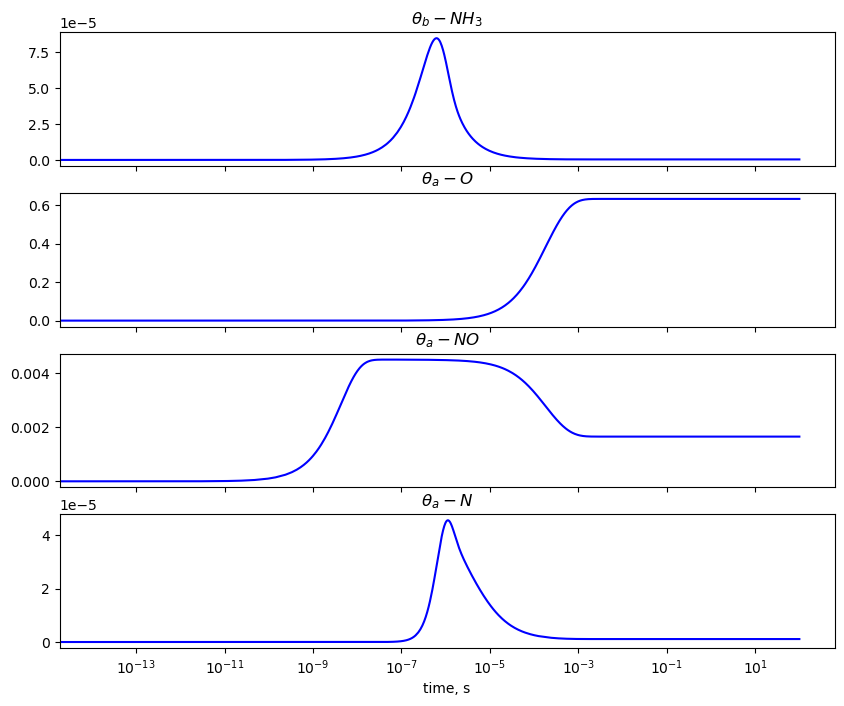

In [38]:
plt.close()
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 8))
axes[0].semilogx(sol.t, sol.y[:,1], color='blue')
axes[0].set_title(r'$\theta_{b}-{NH_3}$')
axes[1].semilogx(sol.t, sol.y[:,3], color='blue')
axes[1].set_title(r'$\theta_{a}-{O}$')
axes[2].semilogx(sol.t, sol.y[:,4], color='blue')
axes[2].set_title(r'$\theta_{a}-{NO}$')
axes[3].semilogx(sol.t, sol.y[:,5], color='blue')
axes[3].set_title(r'$\theta_{a}-{N}$')
axes[3].set_xlabel('time, s')
plt.show()


Observations:
- Note how under these conditions the surface coverage of Oxygen is higher than 60%. This may be an indication of the mechanism of formation of PtO2 that produces the observed etching under operation (based on Krahnert Fig12 SEM results after 30h of operation)
- To my knowledge this increase has not been studied to this day numerically, but there is a group in Russia (Novosibirks) studying this experimentally.
- This etching may be the reason of increased catalytic activity after operation, as it increases the catalyst surface area. 
- Etching has the negative consequence of lowering the catalyst stability, which is one of the main reasons for catalyst replacement in ammonia oxidation reactors.

### Validation against experimental data from the literature